### **Introdução**
A educação online tem se tornado cada dia mais presente e popular, além de impactar positivamente o aprendizado. A modalidade de aprendizado à distância é flexível em relação aos horários de estudo, formas de estudo e até mesmo na questão de não precisar estar presencialmente em uma instituição de ensino.

Essa flexibilidade torna possível realizar mais de uma graduação simultaneamente, conciliar o tempo disponível para outros projetos e trabalho, e, além disso, você consegue realizar cursos em escolas ou universidades de outros países.

Com a pandemia do Corona Vírus, o investimento em educação online cresceu fortemente, revolucionando o cenário educacional em todo o mundo.

As organizações e universidades que oferecem essas modalidades de ensino precisam considerar vários fatores para garantir resultados eficientes no processo de aprendizagem dos estudantes.

### **EDA: Open University Learning Analysis**
A Open University Learning Analytics, fornece dados de cursos, estudantes e suas interações com a VLE (Virtual Learning Environment). A partir dos dados, podemos realizar uma análise exploratória para extrair diversas informações relevantes e então gerar insights que contribuam para os negócios educacionais digitais, para que continuem promovendo e ampliando a qualidade da aprendizagem em vários sentidos.

### **Objetivo da EDA**
Compreender os dados e como eles se relacionam, de forma a gerar insights que possam impactar nos negócios de educação digital. Vamos analisar informações demográficas dos estudantes, módulos em que os alunos se registraram, interações com os materiais e avaliações.

### **Hipóteses**

1) *Variáveis Demográficas influenciam no Resultado Final*

- **Gênero**: Na realidade social atual, sabe-se que a divisão Homem-Mulher é relevante para entendermos o ambiente como um todo. Com isso, buscarei verificar se há uma diferença entre gênero dentro dos resultados finais: Será que mulheres desistem mais do curso?

- **Nível de Escolaridade**: O nível de escolaridade não impacta apenas no conhecimento formal, mas também com possível desempenho no ambiente online. Minha hipótese é de que aqueles com maiores níveis de escolaridade possuam desempenhos melhores.

- **IMD**: A desigualdade econômica afeta acesso à recurso e aprendizado. A minha hipótese é de que estudantes em regiões com menor IMD tenham desempenho inferior ou evasão maior.

- **Idade**: Idade diz respeito à experiência, conhecimento, familiaridade com o assunto dentre outras coisas. Minha hipótese é de que quanto maior a idade, melhor o desempenho final, seja por acúmulo de conhecimento, experiência ou até mesmo dedicação.

- **Deficiência**: Deficiência não afeta apenas locomoção ou comunicação, mas também pode ser uma grande barreira para o estudo, principalmente um estudo à distância, onde não há um apoio forte como o ensino presencial oferece. A minha hipótese é de que pessoas que possuem deficiências possuem desempenho pior.

2) *Quantidade de clicks nos materiais da VLE é positivamente relacionado ao resultado final*

- Se adotarmos a quantidade de clicks nos materiais da VLE como uma proxy para engajamento com o curso e os materiais, espera-se que aqueles que apresentem maior engajamento (maior número de clicks), tenham melhores notas.

3) *Módulos estão divididos por nível de dificuldade*

- Espera-se que os módulos possuam níveis de dificuldades distintos, onde  conforme avançamos nos módulos, encontramos pessoas com níveis de escolaridade maior.


**********************

#### Importando as bibliotecas e os dados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
%matplotlib inline

In [ ]:
student_info = pd.read_csv('/content/drive/MyDrive/Analise de Dados Python/Análises exploratórias/Desafio Trybe/studentInfo.csv')
courses = pd.read_csv('/content/drive/MyDrive/Analise de Dados Python/Análises exploratórias/Desafio Trybe/courses.csv')
assessments = pd.read_csv('/content/drive/MyDrive/Analise de Dados Python/Análises exploratórias/Desafio Trybe/assessments.csv')
student_assessments = pd.read_csv('/content/drive/MyDrive/Analise de Dados Python/Análises exploratórias/Desafio Trybe/studentAssessment.csv')
student_registration = pd.read_csv('/content/drive/MyDrive/Analise de Dados Python/Análises exploratórias/Desafio Trybe/studentRegistration.csv')
student_vle = pd.read_csv('/content/drive/MyDrive/Analise de Dados Python/Análises exploratórias/Desafio Trybe/studentVle.csv')
vle = pd.read_csv('/content/drive/MyDrive/Analise de Dados Python/Análises exploratórias/Desafio Trybe/vle.csv')

### Análise sobre os estudantes 
 - (Banco: student_info)

In [ ]:
# Conferindo as primeiras linhas do banco
student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [ ]:
student_info.dtypes

code_module             object
code_presentation       object
id_student               int64
gender                  object
region                  object
highest_education       object
imd_band                object
age_band                object
num_of_prev_attempts     int64
studied_credits          int64
disability              object
final_result            object
dtype: object

Temos 9 variáveis categóricas e 2 variáveis numéricas.

Começarei a análise pelas variáveis categóricas.



*******

##### Verificando Valores Faltantes

In [ ]:
student_info.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

###### Temos 1.111 valores faltantes. Irei coletar algumas amostras para verificar como esses valores estão distribuidos, para auxiliar na decisão em como trtá-los.

In [ ]:
na_df = student_info[student_info['imd_band'].isnull()]

In [ ]:
na_df.groupby(by=['imd_band', 'age_band'], dropna=False).count()

code_module  code_presentation  ...  disability  final_result
imd_band age_band                                  ...                          
NaN      0-35              672                672  ...         672           672
         35-55             424                424  ...         424           424
         55<=               15                 15  ...          15            15

[3 rows x 10 columns]

In [ ]:
na_df.groupby(by=['imd_band', 'final_result'], dropna=False).count()

code_module  ...  disability
imd_band final_result               ...            
NaN      Distinction           199  ...         199
         Fail                  145  ...         145
         Pass                  531  ...         531
         Withdrawn             236  ...         236

[4 rows x 10 columns]

In [ ]:
na_df.groupby(by=['imd_band', 'region'], dropna=False).count()

code_module  ...  final_result
imd_band region                             ...              
NaN      Ireland                       266  ...           266
         North Region                  731  ...           731
         North Western Region            5  ...             5
         Scotland                       12  ...            12
         South Region                   48  ...            48
         South West Region               5  ...             5
         West Midlands Region           39  ...            39
         Yorkshire Region                5  ...             5

[8 rows x 10 columns]

###### Podemos ver que os dados faltantes estão bem distribuidos e não dizem respeito a somente um grupo específico. Portanto, como é um valor pequeno em relação ao total de linhas do nosso banco, optarei por excluir esses valores.

In [ ]:
student_info.dropna(inplace=True)

In [ ]:
# Verificando se os valores faltantes foram excluídos do banco
student_info.isnull().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

In [ ]:
len(student_info)

31482

Após eliminar os valores faltantes nossa quantidade de observações é **31.482**

###### 1.2) Verificando se não há linhas duplicadas no dataset

In [ ]:
student_info.duplicated().sum()

0

***********

## Análise Exploratória
Realizarei algumas análises para encontrar relações entre as diversas informações dos estudantes e o seu resultado final.
Começarei pelas variáveis categóricas. Para cada uma delas, plotarei alguns gráficos e farei algumas estatísticas para averiguar se de fato existem relações significantes.


### Variáveis Categóricas

###### Explorando relações entre informações demográficas e o Resultado Final

In [ ]:
student_info['final_result'].value_counts()

Pass           11830
Withdrawn       9920
Fail            6907
Distinction     2825
Name: final_result, dtype: int64

In [ ]:
final_result_count = student_info['final_result'].value_counts()

In [ ]:
final_result_perc = final_result_count / len(student_info)

In [ ]:
Result_Final = pd.DataFrame({'Qtde':final_result_count, '%': final_result_perc})

In [ ]:
Result_Final['%'] = Result_Final['%'].map(lambda x: '{:.2%}'.format(x))

In [ ]:
print(Result_Final)

              Qtde       %
Pass         11830  37.58%
Withdrawn     9920  31.51%
Fail          6907  21.94%
Distinction   2825   8.97%


A variávei Final Result possui 4 valores. De acordo com uma pesquisa feita sobre o GCE do Reino Unido, esses valores são:

- Pass: Notas acima de 40 (0-100)
- Withdrawn: Aqueles que desistiram do curso
- Fail: Notas abaixo de 40 (0-100)
- Distinction: Maiores notas, elegíveis para tentar bolsas



#### Gênero vs. Resultado Final

In [ ]:
print(student_info.gender.value_counts())
print(student_info.gender.value_counts(normalize=True))

M    17067
F    14415
Name: gender, dtype: int64
M    0.542119
F    0.457881
Name: gender, dtype: float64


Podemos ver que temos quase 3 mil homens a mais em nossa base de dados. Vamos ver se existe alguma relevância da variável gênero em relação ao resultado final.

In [ ]:
result_genero = student_info.groupby(['final_result', 'gender'])['id_student'].count()
result_genero = result_genero.to_frame()
result_genero.rename(columns={'id_student': 'count'}, inplace=True)

In [ ]:
result_genero_pct = result_genero.groupby(['final_result', 'gender']).agg({'count' : 'sum'})
result_genero_pct = result_genero_pct.groupby(level = 0).apply(lambda x: x / float(x.sum()))
result_genero_pct.reset_index(inplace = True)
result_genero_pct['percent'] = result_genero_pct['count'].map(lambda x: '{:.2%}'.format(x))

In [ ]:
# Plotando o gráfico
colors = ['#006550', '#3DA688']
fig = px.bar(result_genero_pct, x='final_result', y='count', text='percent', color='gender', title='Gender vs. Final Result',
            color_discrete_sequence=colors)
fig.update_layout(barmode='group')
fig.show()

Como havíamos observado, temos uma quantidade maior de homens na base de dados, e o gráfico acima nos confirma isso para cada resultado final. 

Vamos observar por uma perspectiva diferente.

In [ ]:
result_genero2 = student_info.groupby(['gender', 'final_result'])['id_student'].count()
result_genero2 = result_genero2.to_frame()
result_genero2.rename(columns={'id_student': 'count'}, inplace=True)
result_genero_pct2 = result_genero2.groupby(['gender', 'final_result']).agg({'count' : 'sum'})
result_genero_pct2 = result_genero_pct2.groupby(level = 0).apply(lambda x: x / float(x.sum()))
result_genero_pct2.reset_index(inplace = True)
result_genero_pct2['percent'] = result_genero_pct2['count'].map(lambda x: '{:.2%}'.format(x))
# Plotando o gráfico 2
colors = ['#006550', '#3DA688']
fig = px.bar(result_genero_pct2, x='final_result', y='count', text='percent', color='gender', title='Gender vs. Final Result',
            color_discrete_sequence=colors)
fig.update_layout(barmode='group')
fig.show()

In [ ]:
# Qui Quadrado:
'''
H0 : Variáveis são Independentes
H1 : Variáveis são Dependentes
'''
## Gênero x Resultado
tab_gen_result = pd.crosstab(student_info["final_result"],student_info["gender"], margins = False)
stat, p, dof, expected = chi2_contingency(tab_gen_result) 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependentes (Rejeita H0)') 
else: 
    print('Independentes (Não Rejeita H0)')

p value is 2.0186219445941154e-05
Dependentes (Rejeita H0)


**Observações:**  Olhando os dados de outro ângulo, comparando os dois grupos de gênero (M e F), podemos ver que temos uma leve tendência em mulheres tendo mais sucesso no resultado final, mas a diferença não parece ser significativa para dizermos que o gênero influencia de fato no resultado final. No entanto, com o p valor de 0.00002, rejeitamos a H0 de que essas variáves (Gênero e Resultado Final) sejam independentes entre sim.



### Nível de Escolaridade vs. Resultado Final

Antes de iniciar as análises, pesquisei sobre o GCE do Reino Unido (General Certificate of Education). Pude concluir que essa variável de educação, é codificada na seguinte ordem do menor para o maior:

No formal quals, Lower than A Level, A Level or Equivalent, HE Qualification, Post Graduate Qualification

In [ ]:
student_info['highest_education'].value_counts()

A Level or Equivalent          13762
Lower Than A Level             12762
HE Qualification                4444
No Formal quals                  328
Post Graduate Qualification      186
Name: highest_education, dtype: int64

In [ ]:
# Recodificando a Variável
recode = {"HE Qualification": "4 - HE Qualification" ,
          "A Level or Equivalent": "3 - A Level or Equivalent" ,
          "Lower Than A Level": "2 - Lower Than A Level",
          "Post Graduate Qualification": "5 - Post Graduate Qualification", 
          "No Formal quals" : "1 - No Formal quals" }
student_info["n_highest_education"] = student_info["highest_education"].map(recode)

In [ ]:
recode_result = {"Pass": "3 - Pass",
          "Withdrawn" : "1 - Withdrawn",
          "Fail" : "2 - Fail",
          "Distinction" : "4 - Distinction"}
student_info["n_final_result"] = student_info["final_result"].map(recode_result)

#print(sorted(student_info["n_final_result"].unique()))

In [ ]:
result_education = student_info.groupby(['n_highest_education', 'n_final_result'])['id_student'].count()
result_education = result_education.to_frame()
result_education.rename(columns={'id_student': 'count'}, inplace=True)
result_education

count
n_highest_education             n_final_result        
1 - No Formal quals             1 - Withdrawn      146
                                2 - Fail            92
                                3 - Pass            76
                                4 - Distinction     14
2 - Lower Than A Level          1 - Withdrawn     4518
                                2 - Fail          3361
                                3 - Pass          4213
                                4 - Distinction    670
3 - A Level or Equivalent       1 - Withdrawn     3989
                                2 - Fail          2674
                                3 - Pass          5658
                                4 - Distinction   1441
4 - HE Qualification            1 - Withdrawn     1223
                                2 - Fail           751
                                3 - Pass          1825
                                4 - Distinction    645
5 - Post Graduate Qualification 1 - Withdrawn       44
                                2 - Fail            29
                                3 - Pass            58
                                4 - Distinction     55

In [ ]:
r_e = result_education.groupby(['n_highest_education', 'n_final_result']).agg({'count': 'sum'})
r_e_pcts = r_e.groupby(level = 0).apply(lambda x: x / float(x.sum())) #  level = 0 : Está agruipando pelo 1o Indice
r_e_pcts.reset_index(inplace = True)
r_e_pcts['percent'] = r_e_pcts['count'].map(lambda x: '{:.2%}'.format(x))

In [ ]:
# Plotando o gráfico
color = ['#006550', '#3DA688', '#9FC3C5', '#FEFEFE']
fig = px.bar(r_e_pcts, x='count', y='n_highest_education', color='n_final_result', orientation = "h", title='Highest Education vs. Final Result',
             text='percent', color_discrete_sequence=color)
fig.update_traces(textfont_size=12)
fig.update_layout(barmode='stack')
fig.show()

In [ ]:
# Qui Quadrado:
'''
H0 : Variáveis são Independentes
H1 : Variáveis são Dependentes
'''
## Highest_Ed. X Resultado
tab_he_result = pd.crosstab(student_info["highest_education"],student_info["n_final_result"], margins = False)
stat, p, dof, expected = chi2_contingency(tab_he_result) 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependentes (Rejeita H0)') 
else: 
    print('Independentes (Não Rejeita H0)')

p value is 2.7271070121571545e-201
Dependentes (Rejeita H0)


**Observações**: Analisando o gráfico podemos ver que, a taxa de desistência e falha são maiores entre aqueles estudantes que não possuem qualificações formais ou possuem níveis mais baixos. Enquanto que os resultados considerados como destaque (Distinction) estão em maior percentual no nível de pós graduação.

Por fim, podemos ver que com o p valor de 0.2e-200 rejeitamos HO, ou seja, as variáveis são dependentes.


#### IMD vs. Resultado Final

In [ ]:
student_info['imd_band'].value_counts()

20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
Name: imd_band, dtype: int64

In [ ]:
result_imd = student_info.groupby(['imd_band', 'n_final_result'])['id_student'].count()
result_imd = result_imd.to_frame()
result_imd.rename(columns={'id_student': 'count'}, inplace=True)

In [ ]:
r_imd = result_imd.groupby(['imd_band', 'n_final_result']).agg({'count': 'sum'})

In [ ]:
r_imd_pcts = r_imd.groupby(level = 0).apply(lambda x: x / float(x.sum())) #  level = 0 : Está agruipando pelo 1o Indice
r_imd_pcts.reset_index(inplace = True)
r_imd_pcts['percent'] = r_imd_pcts['count'].map(lambda x: '{:.2%}'.format(x))

In [ ]:
# Plotando o gráfico
color = ['#006550', '#3DA688', '#9FC3C5', '#FEFEFE']
fig = px.bar(r_imd_pcts, x='count', y='imd_band', color='n_final_result', orientation = "h", title='IMD vs. Final Result',
             text='percent', color_discrete_sequence=color)
fig.update_traces(textfont_size=10)
fig.update_layout(barmode='stack')
fig.show()

In [ ]:
# Qui Quadrado:
'''
H0 : Variáveis são Independentes
H1 : Variáveis são Dependentes
'''
## IMD_band X Resultado
tab_imd_result = pd.crosstab(student_info["imd_band"],student_info["n_final_result"], margins = False)
stat, p, dof, expected = chi2_contingency(tab_imd_result) 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependentes (Rejeita H0)') 
else: 
    print('Independentes (Não Rejeita H0)')

p value is 3.150931444181126e-123
Dependentes (Rejeita H0)


**Observações**: A partir do gráfico podemos ver que, conforme a faixa de IMD aumenta, o percentual de Distinction (destaque) aumenta e a taxa de falhas diminui. As faixas de IMD mais baixas apresentam uma taxa de desistência e falha maiores.

Além disso, o p valor de 3e-123 nos leva a rejeita H0 o que significa que há dependência entre as variáveis (IMD e Resultado Final)


#### Idade Vs. Resultado Final

In [ ]:
student_info['age_band'].value_counts()

0-35     22272
35-55     9009
55<=       201
Name: age_band, dtype: int64

In [ ]:
age_result = student_info.groupby(['age_band', 'n_final_result'])['id_student'].count()
age_result = age_result.to_frame()
age_result.rename(columns={'id_student': 'count'}, inplace=True)

In [ ]:
age_r = age_result.groupby(['age_band', 'n_final_result']).agg({'count': 'sum'})
age_r_pcts = age_r.groupby(level = 0).apply(lambda x: x / float(x.sum())) #  level = 0 : Está agruipando pelo 1o Indice
age_r_pcts.reset_index(inplace = True)
age_r_pcts['percent'] = age_r_pcts['count'].map(lambda x: '{:.2%}'.format(x))

In [ ]:
# Plotando o gráfico
color = ['#006550', '#3DA688', '#9FC3C5', '#FEFEFE']
fig = px.bar(age_r_pcts, x='count', y='age_band', color='n_final_result', orientation = "h", title='Age vs. Final Result',
             text='percent', color_discrete_sequence=color)
fig.update_traces(textfont_size=12)
fig.update_layout(barmode='stack')

fig.show()

In [ ]:
# Qui Quadrado:
'''
H0 : Variáveis são Independentes
H1 : Variáveis são Dependentes
'''
## Age_band X Resultado
tab_age_result = pd.crosstab(student_info["age_band"],student_info["n_final_result"], margins = False)
stat, p, dof, expected = chi2_contingency(tab_age_result) 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependentes (Rejeita H0)') 
else: 
    print('Independentes (Não Rejeita H0)')

p value is 1.395702676844307e-43
Dependentes (Rejeita H0)


**Observações**: Podemos observar que a faixa de idade menor apresenta maior taxa de desistência. 
Conforme a idade vai aumentando essa taxa de desistência diminui e as taxas de sucesso do resultado final aumentam.

Além disso, confirmamos com o p valor de 1e-43 que, as variáveis (Idade e Resultado Final) possuem certo grau de dependência entre elas. 

#### Deficiência Vs. Resultado Final

Valores da Coluna:

N: Não possui deficiência

Y: Possui deficiência

In [ ]:
student_info['disability'].value_counts()

N    28351
Y     3131
Name: disability, dtype: int64

In [ ]:
result_disability = student_info.groupby(['disability', 'final_result'])['id_student'].count()
result_disability = result_disability.to_frame()
result_disability.rename(columns={'id_student': 'count'}, inplace=True)
result_disability_pct = result_disability.groupby(['disability', 'final_result']).agg({'count' : 'sum'})
result_disability_pct = result_disability_pct.groupby(level = 0).apply(lambda x: x / float(x.sum()))
result_disability_pct = result_disability_pct.reset_index()
result_disability_pct['percent'] = result_disability_pct['count'].map(lambda x: '{:.2%}'.format(x))

colors = ['#006550', '#3DA688']
fig = px.bar(result_disability_pct, x='final_result', y='count', text='percent', color='disability', title='Disability vs. Final Result',
            color_discrete_sequence=colors)
fig.update_layout(barmode='group')
fig.show()

In [ ]:
# Qui Quadrado:
'''
H0 : Variáveis são Independentes
H1 : Variáveis são Dependentes
'''
## Disability X Resultado
tab_dis_result = pd.crosstab(student_info["disability"],student_info["final_result"], margins = False)
stat, p, dof, expected = chi2_contingency(tab_dis_result) 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependentes (Rejeita H0)') 
else: 
    print('Independentes (Não Rejeita H0)')

p value is 2.8152011535582687e-27
Dependentes (Rejeita H0)


**Observações:** Analisando o gráfico, podemos ver que os estudantes que se declararam com deficiência desistem mais do curso do aqueles que não possuem  deficiência. Além disso, os que não possuem deficiência passam mais no curso do que os que possuem deficiência. 

Nosso p valor de 2e-27 confirma uma relação entre as variáveis (Deficiência e Resultado Final).

********

#### Variáveis Numéricas

In [ ]:
import statistics as st

In [ ]:
student_info.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'n_highest_education',
       'n_final_result'],
      dtype='object')

**num_of_prev_attempts**: Número de tentativas anteriores, que o estudante tentou o curso.

In [ ]:
student_info['num_of_prev_attempts'].describe()

count    31482.000000
mean         0.164507
std          0.482633
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: num_of_prev_attempts, dtype: float64

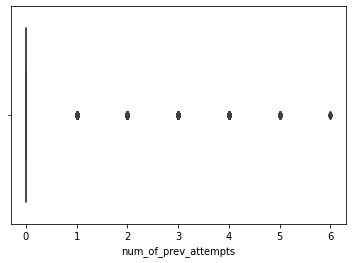

In [ ]:
sns.boxplot(x='num_of_prev_attempts', data=student_info)

Esta variável concentra-se ao redor de 0 tentativas ou seja, a primeira vez que a pessoa realiza o curso. No entanto, temos pessoas que tentaram até 6 vezes (outliers).

**studied_credits**: Número de créditos que a pessoa está cursando. 
Não sabemos quantos créditos equivalem a um módulo.

In [ ]:
student_info['studied_credits'].describe()

count    31482.000000
mean        79.767804
std         41.049455
min         30.000000
25%         60.000000
50%         60.000000
75%        120.000000
max        655.000000
Name: studied_credits, dtype: float64

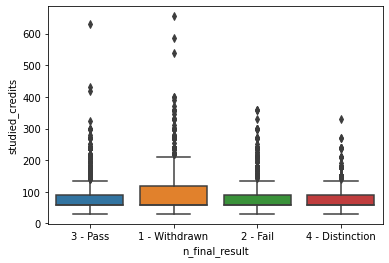

In [ ]:
sns.boxplot(x='n_final_result', y='studied_credits', data=student_info)

Não existe uma relação observável entre ter créditos e o resultado final.

Finalizamos as análises das informações demográficas dos estudantes.

*******************

#### Análise Exploratória da Interação com o Virtual Learning Enviroment

**student_vle**

In [ ]:
student_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [ ]:
student_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


Esse banco possui 6 variáveis, sendo duas delas categorias e 4 numéricas.
Queremos avaliar se a quantidade de interações "sum_click" tem relevância no resultado final. Portanto, vamos trabalhar somente com as variáveis:

- id_student
- code_module 
- code_presentation
- sum_click

In [ ]:
student_vle2 = student_vle[['id_student', 'code_module', 'code_presentation', 'sum_click']]

In [ ]:
student_vle2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 4 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   id_student         int64 
 1   code_module        object
 2   code_presentation  object
 3   sum_click          int64 
dtypes: int64(2), object(2)
memory usage: 325.2+ MB


#### Verificando Valores Faltantes

In [ ]:
student_vle2.isnull().sum()

id_student           0
code_module          0
code_presentation    0
sum_click            0
dtype: int64

Vamos agrupar as quantidades de clicks por estudante

In [ ]:
student_vle3 = student_vle2.groupby(by = ["id_student", 'code_module', 'code_presentation']).sum("sum_click")

In [ ]:
student_vle3.shape

(29228, 1)

Agora vou levar a informação de clicks para a base de student.info.
Para isso precisaremos "juntar" nossa base agrupada "student_vle3" com student.info

Vamos realizar um merge para tarzer somente aqueles estudantes que tiveram interações com a VLE (inner join).

In [ ]:
student_result_click = pd.merge(left=student_info, right=student_vle3, left_on=["id_student","code_module", "code_presentation"],
                                right_on=["id_student", "code_module", "code_presentation"])

In [ ]:
student_result_click.shape

(28174, 15)

In [ ]:
student_result_click.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,n_highest_education,n_final_result,sum_click
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,4 - HE Qualification,3 - Pass,934
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,4 - HE Qualification,3 - Pass,1435
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,3 - A Level or Equivalent,1 - Withdrawn,281
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,3 - A Level or Equivalent,3 - Pass,2158
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,2 - Lower Than A Level,3 - Pass,1034


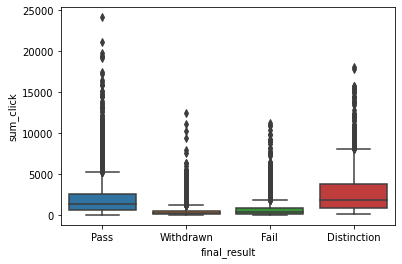

In [ ]:
sns.boxplot(x='final_result', y='sum_click', data=student_result_click)

No gráfico acima, plotamos a distribuição da quantidade de interações com a VLE por reultado final. 

Como temos bastante outliers, vou utilizar a mediana para entender melhor essa relação.

In [ ]:
student_result_click.groupby('final_result')[['sum_click']].median()

,sum_click
final_result,
Distinction,1849
Fail,345
Pass,1316
Withdrawn,217


In [ ]:
student_result_click.groupby('final_result')[['sum_click']].median().plot(kind='bar')

In [ ]:
t = student_result_click.groupby('final_result')[['sum_click']].median()

In [ ]:
t.reset_index(inplace = True)

In [ ]:
t

,final_result,sum_click
0,Distinction,1849
1,Fail,345
2,Pass,1316
3,Withdrawn,217


In [ ]:
colors = ['#006550', '#3DA688', '#9FC3C5', '#FEFEFE']
fig = px.bar(t, x='final_result', y='sum_click', text='sum_click', color='final_result', title='Sum_Click vs. Final Result',
           color_discrete_sequence=colors)
#fig.update_layout(barmode='group')
fig.show()

Podemos afirmar que a quantidade de clicks, ou interação com a VLE tem muita influência no resultado final. 

Além disso, pela mediana mais alta ser do resultado "Distinction", podemos dizer que, quanto mais interações e acessos, melhor a performance no curso (módulo).

### Análise Exploratória dos Cursos/Módulos

Quero tentar descobrir em qual Módulo as pessoas estão passando mais, menos ou desistindo mais.

In [ ]:
student_info['code_module'].value_counts()

BBB    7846
FFF    7395
DDD    5992
CCC    4180
EEE    2817
GGG    2527
AAA     725
Name: code_module, dtype: int64

In [ ]:
result_module = student_info.groupby(['code_module', 'n_final_result'])['id_student'].count()
result_module = result_module.to_frame()
result_module.rename(columns={'id_student': 'count'}, inplace=True)
result_module_pct = result_module.groupby(['code_module', 'n_final_result']).agg({'count' : 'sum'})
result_module_pct = result_module_pct.groupby(level = 0).apply(lambda x: x / float(x.sum()))
result_module_pct.reset_index(inplace = True)
result_module_pct['percent'] = result_module_pct['count'].map(lambda x: '{:.2%}'.format(x))

In [ ]:
result_module_pct

,code_module,final_result,count,percent
0,AAA,Distinction,0.056552,5.66%
1,AAA,Fail,0.122759,12.28%
2,AAA,Pass,0.649655,64.97%
3,AAA,Withdrawn,0.171034,17.10%
4,BBB,Distinction,0.085011,8.50%
5,BBB,Fail,0.224063,22.41%
6,BBB,Pass,0.388223,38.82%
7,BBB,Withdrawn,0.302702,30.27%
8,CCC,Distinction,0.102871,10.29%
9,CCC,Fail,0.178947,17.89%


In [ ]:
# Plotando o gráfico 2
colors = ['#006550', '#3DA688', '#9FC3C5', '#FEFEFE']
fig = px.bar(result_module_pct, x='count', y='code_module', text='percent', color='n_final_result', title='Module vs. Final Result', orientation='h',
           color_discrete_sequence=colors)
fig.update_traces(textfont_size=10)
fig.update_layout(barmode='stack')
fig.show()

Conforme o gráfico nos diz, os Módulos com maior taxa de desistência são os CCC, DDD e FFF;

Os módulos em que os estudantes mais falham são GGG, DDD e FFF;

E os módulos em que os estudantes mais passam é o AAA.



Módulo vs. Escolaridade



In [ ]:
edu_module = student_info.groupby(['code_module', 'highest_education'])['id_student'].count()
edu_module = edu_module.to_frame()
edu_module.rename(columns={'id_student': 'count'}, inplace=True)
edu_module_pct = edu_module.groupby(['code_module', 'highest_education']).agg({'count' : 'sum'})
edu_module_pct = edu_module_pct.groupby(level = 0).apply(lambda x: x / float(x.sum()))
edu_module_pct.reset_index(inplace = True)
edu_module_pct['percent'] = edu_module_pct['count'].map(lambda x: '{:.1%}'.format(x))

In [ ]:
edu_module_pct

,code_module,n_highest_education,count,percent
0,AAA,2 - Lower Than A Level,0.213793,21.4%
1,AAA,3 - A Level or Equivalent,0.540690,54.1%
2,AAA,4 - HE Qualification,0.238621,23.9%
3,AAA,5 - Post Graduate Qualification,0.006897,0.7%
4,BBB,1 - No Formal quals,0.013765,1.4%
5,BBB,2 - Lower Than A Level,0.455519,45.6%
6,BBB,3 - A Level or Equivalent,0.414351,41.4%
7,BBB,4 - HE Qualification,0.114581,11.5%
8,BBB,5 - Post Graduate Qualification,0.001784,0.2%
9,CCC,1 - No Formal quals,0.008373,0.8%


In [ ]:
# Plotando o gráfico 2
colors = ['#006550', '#1954DA', '#3DA688', '#9FC3C5', '#FEFEFE']
fig = px.bar(edu_module_pct, x='highest_education', y='count', text='percent', color = "highest_education", title='Module vs. Highest Education',
           color_discrete_sequence=colors, facet_col='code_module', facet_col_wrap=2,
           height = 1000, width = 1000
           )
fig.update_layout(barmode='stack')
fig.update_xaxes(matches=None, showticklabels=True, visible=False)
fig.update_yaxes(matches=None, showticklabels=True, visible=False)
fig.update_traces(textfont_size=10)


fig.update_layout(
    # keep the original annotations and add a list of new annotations:
    annotations = list(fig.layout.annotations) + 
    [go.layout.Annotation(
            x=-0.07,
            y=0.5,
            font=dict(
                size=16, color = 'black'
            ),
            showarrow=False,
            text="Porcentagem",
            textangle=-90,
            xref="paper",
            yref="paper"
        )
    ] +
    [go.layout.Annotation(
            x=0.5,
            y=-0.08,
            font=dict(
                size=16, color = 'black'
            ),
            showarrow=False,
            text="Higher Education",
            textangle=-0,
            xref="paper",
            yref="paper"
        )
    ]
)

fig.show()

A principio, cogitei que os Módulos estivessem relacionados e dividos por níveis de dificuldade, onde haveria uma progressão entre o mais fácil para o mais difícil e que os mais "qualificados" formalmente (com as maiores highest education) seriam predominantes em algum módulo.

No entanto, ao plotar as variáveis: code_module x highest education, observei que:

- **Lower than A level** é predominante no GGG e bem menor no AAA;

- **HE Qualification** é maior no GGG;

- **A level or equivalent** predomina em todos os módulos exceto GGG e BBB, mas 
ainda tem mais força que outros níveis maiores

Mas isso não é suficiente para afirmarmos nada. 

Independente do Módulo, predominam os que possuem qualificação "A Level or Equivalent" e "Lower than A Lavel", com os Pós-graduados e com os sem alguma qualificação formal sendo a minoria. 



### FIM!!